# 시계열 데이터의 특징

### 사전 지식   
시계열 분석의 목적  
시계열 분석이란 __미래 예측__ 을 목적으로 __시간 정보가 포함된 데이터를__ 활용하는 분석 방법

### 정상성 : 통계적 시계열 분석에 필요한 가정 
[출처](https://assaeunji.github.io/statistics/2021-08-08-stationarity/)

시계열 자료를 분석하는 통계적인 방법에서 빠질 수 없는 개념은 __정상성(Stationarity)__ 이다.  
시계열 분석을 할 때 필수적으로 고려하는 가정이다. 정상성을 만족해야만 분석 결과에 대해 신뢰할 수 있다.

### 1. 정상성과 비정상성

Q 1. 정상성을 판단하는 기준은 무엇인가

한 [블로그](https://m.blog.naver.com/dsz08082/222042702104)에 따르면 정상성은 다음 3가지 조건을 만족해야 한다고 말한다.  
1. 평균값은 시간 t에 관계없이 일정하다. 즉, 임의의 t에 대해서 $ E(X_t) = \mu$
2. 분산값은 시간 t에 관계없이 일정하다. 즉, 임의의 t에 대해서 $ Var(X_t) < \infty$
3. 공분산은 시간 t에 의존하지 않고 오직 시차에만 의존한다. 즉, 임의의 t, h에 대해서 $ Cov(X_{t+h}, X_t) = \gamma(h) $

예정) 이 정보를 토대로 정상성을 판단해보자.

In [1]:
# 정상성 데이터 중 하나인 "화이트 노이즈" 패턴을 python으로 구현해보자

from random import gauss
from random import seed
from pandas import Series
import matplotlib.pyplot as plt


In [12]:
# 화이트 노이즈 생성
series = [gauss(0.0, 1.0) for i in range(1000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

# 위 화이트 노이즈의 기본적인 통계값 살펴보기
series.describe()


count    1000.000000
mean        0.032856
std         1.001806
min        -2.776427
25%        -0.621361
50%         0.063572
75%         0.698801
max         3.453323
dtype: float64

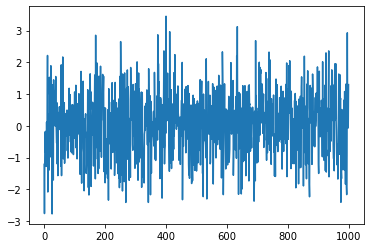

In [13]:
# 화이트 노이즈 시각화
series.plot()
plt.show()

정상성을 띄는 시계열은 시간의 흐름에 따라 평균이나 분산 등의 통계적 특성이 변하지 않는다고 한다.  
정말로 그런지 추가적인 실험을 통해 살펴보자

In [26]:
# ~ 100 일때 평균과 분산
series = [gauss(0.0, 1.0) for i in range(100)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

mean = round(np.mean(series), 4)
var = round(np.var(series), 4)

print("mean: {},  var: {}".format(mean, var))

mean: 0.2034,  var: 1.0045


In [27]:
# ~ 1,000 일때 평균과 분산
series = [gauss(0.0, 1.0) for i in range(1000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

mean = round(np.mean(series), 4)
var = round(np.var(series), 4)

print("mean: {},  var: {}".format(mean, var))

mean: -0.0328,  var: 1.0011


In [28]:
# ~ 10,000 일때 평균과 분산
series = [gauss(0.0, 1.0) for i in range(10000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

mean = round(np.mean(series), 4)
var = round(np.var(series), 4)

print("mean: {},  var: {}".format(mean, var))

mean: 0.0065,  var: 0.9963


In [29]:
# ~ 100,000 일때 평균과 분산
series = [gauss(0.0, 1.0) for i in range(100000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

mean = round(np.mean(series), 4)
var = round(np.var(series), 4)

print("mean: {},  var: {}".format(mean, var))

mean: -0.0036,  var: 0.9989


In [30]:
# ~ 1,000,00 일때 평균과 분산
series = [gauss(0.0, 1.0) for i in range(1000000)] #평균이 0, 표준편차가 1인 정규분포 안에서 랜덤으로 화이트 노이즈를 생성
series = Series(series) # 데이터 타입을 시리즈로 변환

mean = round(np.mean(series), 4)
var = round(np.var(series), 4)

print("mean: {},  var: {}".format(mean, var))

mean: -0.0015,  var: 0.9981


가우시안 분포 안에서 랜덤한 노이즈를 발생시켰으므로 평균은 0에 분산은 1에 가깝게 나온다.  
데이터 범위가 길어질수록 이 값은 더욱 강하게 수렴하는 모습을 볼 수 있다.  
당연한 말인가? 그렇다면 이걸 어디에 활용하게 되는 걸까.

## 비정상성



In [6]:
# 비정상성 시계열 데이터인 확률 보행을 구현해보자

import numpy as np
import matplotlib.pyplot as plt

In [9]:
probability =[0.5, 0.5] # up, down > ???

# starting point
start = 0
rand_walks = [start]

# create the random points
rand_point = np.random.random(300)
down_probability = rand_point < probability[0]
up_probability = rand_point >= probability[1]
    

In [10]:
# random walk process
# z(t) = z(t-1) + a(t), where a(t) is white noise

for down, up in zip(down_probability, up_probability):
    rand_walks.append(rand_walks[-1] - down + up)

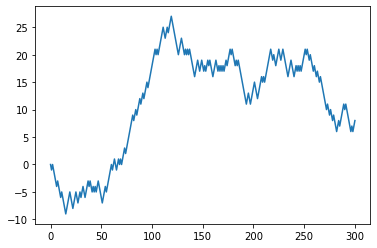

In [11]:
plt.plot(rand_walks)
plt.show()

#### 추가 질문
확률 보행의 개념을 알아보자


### 2. 시계열 데이터의 패턴
시계열 데이터가 아래 패턴 중 하나라도 해당하면 정상성이 없다고 본다.  
아래 특징을 살펴보자


#### 1. Trend(추세성 또는 경향성) : 
    측정 값이 시간의 흐름에 따라 증감, 반복을 하는 일정한 패턴이 있는지  
    시계열 데이터의 관점 구간에 따라 상승 또는 하락 경향을 보여줌
    이 Trend를 판단하는 방법은 이동평균을 사용하는 것이다. 대표적인 방법은 평활(Smothin)법이 있다.
    
#### 2. Seasonality(계절성) : 
    일, 월, 년 계절 등 일정 시간에 따라 지속해서 반복되는 패턴이 있는지  
    
    
    
#### 3. Cycle : 
    기간에 걸쳐 반복되는 패턴이 있는지



Kospi Data를 활용해 시계열 패턴을 분석해보자.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

kospi = pd.read_csv('data/kospi_data.csv') # 데이터 읽어오기
print(kospi.describe()) 
print(kospi.info())


              Close          Open          High           Low        Volume  \
count  11024.000000  11024.000000  11024.000000  11024.000000  1.102400e+04   
mean    1121.077967   1121.552291   1127.448217   1114.365044  2.556932e+08   
std      772.891667    773.393378    777.129136    768.310046  2.938432e+08   
min      105.990000    105.990000    105.990000    105.990000  1.660000e+05   
25%      586.562500    586.482500    589.730000    582.837500  1.208750e+07   
50%      878.105000    878.015000    882.360000    873.430000  2.264900e+08   
75%     1891.347500   1892.090000   1902.320000   1880.635000  4.028000e+08   
max     3305.210000   3305.460000   3316.080000   3295.440000  3.460000e+09   

             Change  
count  11024.000000  
mean       0.000379  
std        0.014550  
min       -0.120200  
25%       -0.006300  
50%        0.000300  
75%        0.007200  
max        0.119500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (

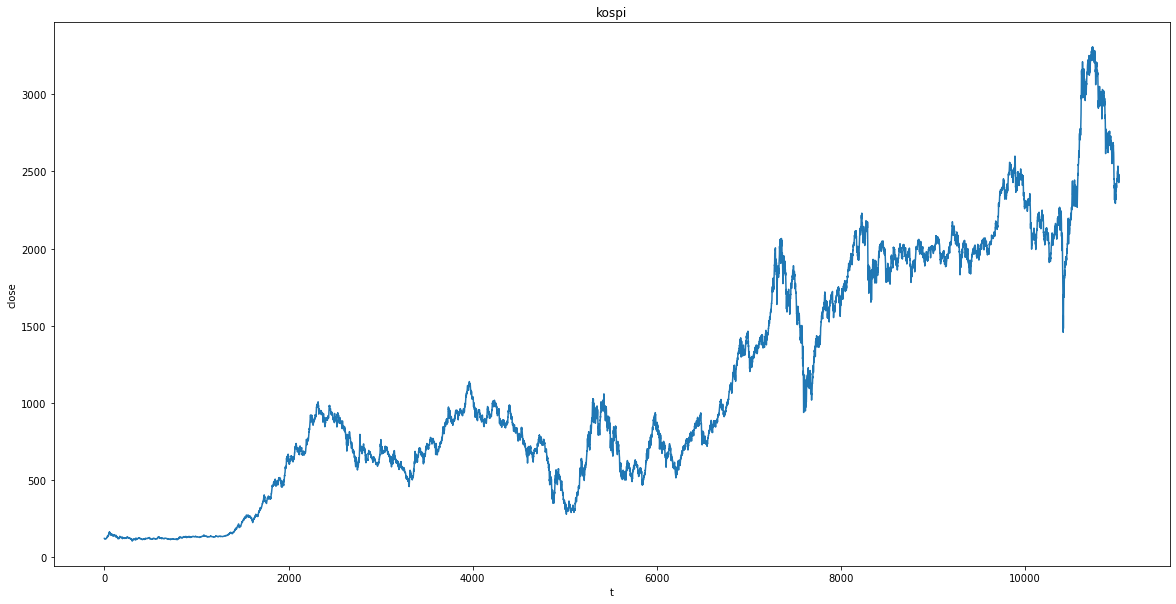

In [11]:
# kospi 데이터에서 종가를 시리즈 타입으로 가져온다.
kospi_close = kospi['Close']

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(kospi_close)
plt.xlabel("t")
plt.ylabel("close")
plt.title('kospi')
plt.show()

### Trend 성분 측정하기

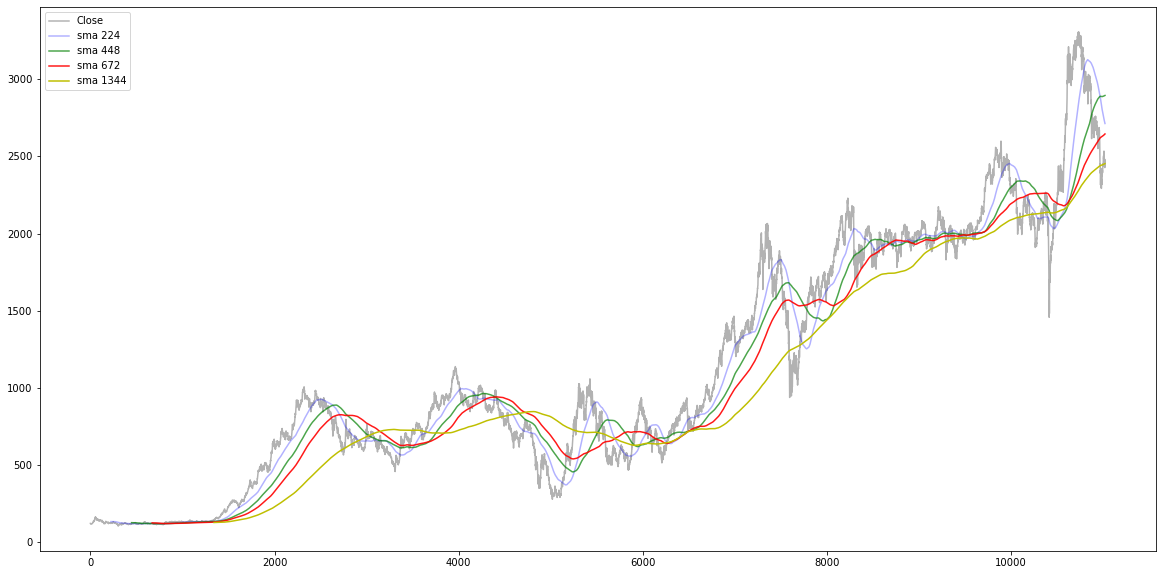

In [12]:
# Trend 성향을 알아보기 위해 이동평균을 시각화해보자
# 코스피 전체 기간을 사용하기 때문에 이동평균 기간도 크게 설정하였다.

# Pandas의 Series 데이터를 대상으로 일정 범위에 대한 규칙전 연산(예를 들면 이동평균)을 해야할 때 유용하게 사용 할 수 있는 함수가 
# pandas.Series.rolling 이다. 

kospi_close = kospi_close.to_frame()
kospi_close['sma224'] = kospi_close['Close'].rolling(224).mean()
kospi_close['sma448'] = kospi_close['Close'].rolling(448).mean()
kospi_close['sma672'] = kospi_close['Close'].rolling(672).mean()
kospi_close['sma1344'] = kospi_close['Close'].rolling(1344).mean()

kospi_sma = kospi_close.dropna()

plt.figure(figsize=(20, 10))
plt.plot(kospi_close.index, kospi_close['Close'], c='k', alpha=0.3, label='Close')
plt.plot(kospi_close.index, kospi_close['sma224'], c='b', alpha=0.3, label='sma 224')
plt.plot(kospi_close.index, kospi_close['sma448'], c='g', alpha=0.7, label='sma 448')
plt.plot(kospi_close.index, kospi_close['sma672'], c='r', alpha=0.9, label='sma 672')
plt.plot(kospi_close.index, kospi_close['sma1344'], c='y', label='sma 1344')


plt.legend()
plt.show()

위 그래프를 보면 특정 구간에서 횡보하지만 전체 성향은 우상향 하는 것으로 볼 수 있다.  
또 이동평균의 기간이 커질 수록 추세를 더 강하게 볼 수 있다. 적절한 이동평균의 기간은 시행착오를 반복하며 결정해야 한다.

In [ ]:
# 계절성을 포함한 성분 분해하하기


## References

#### 정상성과 비정상성  
https://aliencoder.tistory.com/3
  
  
#### 추세, 계절, 주기
https://jjeongil.tistory.com/662  
https://medium.com/@connect2yh/%EB%8B%A4%EC%A7%9C%EA%B3%A0%EC%A7%9C-%EB%B0%B0%EC%9B%8C%EB%B3%B4%EB%8A%94-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%B6%84%EC%84%9D-%ED%8C%A8%ED%84%B4-%EC%AA%BC%EA%B0%9C%EA%B8%B0-seasonal-decomposition-1%ED%8E%B8-bd9483795960